# Prediction of Traffic Accident Risk
Team 7: 어서오십쇼HUMAN  
Editor: 김용현
## 1. Preprocess

In [1]:
# 사전 준비
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

plt.style.use('seaborn')
sns.set(font_scale=2.5)

warnings.filterwarnings('ignore')

%matplotlib inline

In [28]:
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   


NameError: name 'matplotlib' is not defined

In [2]:
sample = pd.read_csv('../input/sample_accident.csv')

print("sample.shape:", sample.shape)

# 초기 샘플 데이터
sample

sample.shape: (362297, 10)


,발생일,발생시간,요일,발생지_시군구,사고내용,노면상태,기상상태,도로형태_대분류,가해자차종,가해자연령
0,20100101,00시,금,마포구,경상,젖음/습기,맑음,단일로,승용차,54세
1,20100101,00시,금,동작구,중상,서리/결빙,맑음,단일로,승합차,57세
2,20100101,00시,금,관악구,경상,서리/결빙,흐림,단일로,승용차,51세
3,20100101,00시,금,강서구,경상,건조,맑음,교차로,승용차,56세
4,20100101,00시,금,구로구,경상,건조,맑음,교차로,승용차,33세
...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23시,월,동작구,경상,건조,맑음,단일로,승용차,34세
362293,20181231,23시,월,강서구,부상신고,건조,맑음,교차로,승용차,56세
362294,20181231,23시,월,강동구,경상,건조,맑음,교차로,승용차,57세
362295,20181231,23시,월,강동구,경상,건조,맑음,단일로,승용차,59세


In [3]:
#Date,Time,Day,Location,Target,RoadState,Weather,RoadShape,Type,Age

sample.rename(columns={"발생일":"Date", "발생시간":"Time", "요일":"Day", "발생지_시군구":"Location", "사고내용":"Target", "노면상태":"RoadState", "기상상태":"Weather", "도로형태_대분류":"RoadShape","가해자차종":"Type", "가해자연령":"Age"}, inplace=True)

sample

,Date,Time,Day,Location,Target,RoadState,Weather,RoadShape,Type,Age
0,20100101,00시,금,마포구,경상,젖음/습기,맑음,단일로,승용차,54세
1,20100101,00시,금,동작구,중상,서리/결빙,맑음,단일로,승합차,57세
2,20100101,00시,금,관악구,경상,서리/결빙,흐림,단일로,승용차,51세
3,20100101,00시,금,강서구,경상,건조,맑음,교차로,승용차,56세
4,20100101,00시,금,구로구,경상,건조,맑음,교차로,승용차,33세
...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23시,월,동작구,경상,건조,맑음,단일로,승용차,34세
362293,20181231,23시,월,강서구,부상신고,건조,맑음,교차로,승용차,56세
362294,20181231,23시,월,강동구,경상,건조,맑음,교차로,승용차,57세
362295,20181231,23시,월,강동구,경상,건조,맑음,단일로,승용차,59세


In [4]:
# Feature: 가해자연령

# 나이 불명인 열 삭제
sample = sample[sample['Age'] != '불명']

# 문자열 제거: ex 54'세' 제거
sample['Age'] = sample['Age'].str[:-1]

# dtype: object -> int
sample['Age'] = sample['Age'].astype('int')


In [5]:
# bins, labels
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['10', '20', '30', '40', '50', '60', '70', '80']

# 나이대 분류
sample['AgeBand'] = pd.cut(sample['Age'], bins=bins, labels=labels)

# Drop NaN values
sample.dropna(how='any', inplace=True)

sample

,Date,Time,Day,Location,Target,RoadState,Weather,RoadShape,Type,Age,AgeBand
0,20100101,00시,금,마포구,경상,젖음/습기,맑음,단일로,승용차,54,50
1,20100101,00시,금,동작구,중상,서리/결빙,맑음,단일로,승합차,57,50
2,20100101,00시,금,관악구,경상,서리/결빙,흐림,단일로,승용차,51,50
3,20100101,00시,금,강서구,경상,건조,맑음,교차로,승용차,56,50
4,20100101,00시,금,구로구,경상,건조,맑음,교차로,승용차,33,30
...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23시,월,동작구,경상,건조,맑음,단일로,승용차,34,30
362293,20181231,23시,월,강서구,부상신고,건조,맑음,교차로,승용차,56,50
362294,20181231,23시,월,강동구,경상,건조,맑음,교차로,승용차,57,50
362295,20181231,23시,월,강동구,경상,건조,맑음,단일로,승용차,59,50


In [6]:
sample

,Date,Time,Day,Location,Target,RoadState,Weather,RoadShape,Type,Age,AgeBand
0,20100101,00시,금,마포구,경상,젖음/습기,맑음,단일로,승용차,54,50
1,20100101,00시,금,동작구,중상,서리/결빙,맑음,단일로,승합차,57,50
2,20100101,00시,금,관악구,경상,서리/결빙,흐림,단일로,승용차,51,50
3,20100101,00시,금,강서구,경상,건조,맑음,교차로,승용차,56,50
4,20100101,00시,금,구로구,경상,건조,맑음,교차로,승용차,33,30
...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23시,월,동작구,경상,건조,맑음,단일로,승용차,34,30
362293,20181231,23시,월,강서구,부상신고,건조,맑음,교차로,승용차,56,50
362294,20181231,23시,월,강동구,경상,건조,맑음,교차로,승용차,57,50
362295,20181231,23시,월,강동구,경상,건조,맑음,단일로,승용차,59,50


In [7]:
sample.dtypes

Date            int64
Time           object
Day            object
Location       object
Target         object
RoadState      object
Weather        object
RoadShape      object
Type           object
Age             int64
AgeBand      category
dtype: object

In [8]:
# Feature: Time

sample["Time"] = sample['Time'].str[:-1]

sample['Time'] = sample['Time'].astype('int')

In [9]:
# Feature: Target
TargetNameArr = ['Minor','Wound','Death','Heavy']

# 데이터명 수정
sample['Target'] = np.where(sample['Target'] == '경상', '0' ,sample['Target'])
sample['Target'] = np.where(sample['Target'] == '부상신고', '1',sample['Target'])
sample['Target'] = np.where(sample['Target'] == '사망', '2',sample['Target'])
sample['Target'] = np.where(sample['Target'] == '중상', '3',sample['Target'])

sample['Target'] = sample['Target'].astype('int')
temp = sample['Target']

#
sample['TargetOrigin'] = temp

# One-hot encoding
sample = pd.get_dummies(sample, columns=['Target'], prefix=['Target'])



In [10]:
# 각 타입별 타겟 데이터
typeData = pd.crosstab(sample.Type, sample.TargetOrigin, margins=True)
weatherData = pd.crosstab(sample.Weather, sample.TargetOrigin, margins=True)
roadShapeDate = pd.crosstab(sample.RoadShape, sample.TargetOrigin, margins=True)
roadStateData = pd.crosstab(sample.RoadState, sample.TargetOrigin, margins=True)

In [11]:
# Feature: Type.all 500개 미만 type 제거
for data, index in zip(typeData.All, typeData.index):
    if data < 500:
        sample = sample[sample['Type'] != index]
        
# Feature: Weather, RoadShape, RoadState 결측값(불명) 제거
sample = sample[sample['Weather'] != '불명']

sample = sample[sample['RoadShape'] != '불명']



In [12]:
sample

,Date,Time,Day,Location,RoadState,Weather,RoadShape,Type,Age,AgeBand,TargetOrigin,Target_0,Target_1,Target_2,Target_3
0,20100101,0,금,마포구,젖음/습기,맑음,단일로,승용차,54,50,0,1,0,0,0
1,20100101,0,금,동작구,서리/결빙,맑음,단일로,승합차,57,50,3,0,0,0,1
2,20100101,0,금,관악구,서리/결빙,흐림,단일로,승용차,51,50,0,1,0,0,0
3,20100101,0,금,강서구,건조,맑음,교차로,승용차,56,50,0,1,0,0,0
4,20100101,0,금,구로구,건조,맑음,교차로,승용차,33,30,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23,월,동작구,건조,맑음,단일로,승용차,34,30,0,1,0,0,0
362293,20181231,23,월,강서구,건조,맑음,교차로,승용차,56,50,1,0,1,0,0
362294,20181231,23,월,강동구,건조,맑음,교차로,승용차,57,50,0,1,0,0,0
362295,20181231,23,월,강동구,건조,맑음,단일로,승용차,59,50,0,1,0,0,0


In [13]:
DayArray =['일','월','화','수','목','금','토']
print(DayArray[0])
for a in range(0,len(DayArray)):
    sample['Day'] = np.where(sample['Day'] == DayArray[a],a,sample['Day'])

일


In [14]:
sample.dtypes

Date               int64
Time               int64
Day               object
Location          object
RoadState         object
Weather           object
RoadShape         object
Type              object
Age                int64
AgeBand         category
TargetOrigin       int64
Target_0           uint8
Target_1           uint8
Target_2           uint8
Target_3           uint8
dtype: object

In [15]:
sample[['AgeBand', 'TargetOrigin','Target_0','Target_1','Target_2','Target_3']].groupby(['AgeBand'], as_index=True).count()



,TargetOrigin,Target_0,Target_1,Target_2,Target_3
AgeBand,,,,,
10,15606,15606,15606,15606,15606
20,47158,47158,47158,47158,47158
30,61248,61248,61248,61248,61248
40,76624,76624,76624,76624,76624
50,89667,89667,89667,89667,89667
60,48334,48334,48334,48334,48334
70,10923,10923,10923,10923,10923
80,701,701,701,701,701


In [16]:
pd.crosstab(sample['AgeBand'], sample['TargetOrigin'], margins=True)

TargetOrigin,0,1,2,3,All
AgeBand,,,,,
10,8000,2724,145,4737,15606
20,27875,3795,506,14982,47158
30,36437,3930,534,20347,61248
40,46233,4352,651,25388,76624
50,55615,4906,840,28306,89667
60,29904,2783,501,15146,48334
70,6568,900,152,3303,10923
80,377,100,14,210,701
All,211009,23490,3343,112419,350261


In [17]:
temp = pd.get_dummies(sample.Location)
temp.columns[0]

'강남구'

In [18]:
sample

,Date,Time,Day,Location,RoadState,Weather,RoadShape,Type,Age,AgeBand,TargetOrigin,Target_0,Target_1,Target_2,Target_3
0,20100101,0,5,마포구,젖음/습기,맑음,단일로,승용차,54,50,0,1,0,0,0
1,20100101,0,5,동작구,서리/결빙,맑음,단일로,승합차,57,50,3,0,0,0,1
2,20100101,0,5,관악구,서리/결빙,흐림,단일로,승용차,51,50,0,1,0,0,0
3,20100101,0,5,강서구,건조,맑음,교차로,승용차,56,50,0,1,0,0,0
4,20100101,0,5,구로구,건조,맑음,교차로,승용차,33,30,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23,1,동작구,건조,맑음,단일로,승용차,34,30,0,1,0,0,0
362293,20181231,23,1,강서구,건조,맑음,교차로,승용차,56,50,1,0,1,0,0
362294,20181231,23,1,강동구,건조,맑음,교차로,승용차,57,50,0,1,0,0,0
362295,20181231,23,1,강동구,건조,맑음,단일로,승용차,59,50,0,1,0,0,0


In [19]:
# 각 feature들의 type
sample.dtypes

Date               int64
Time               int64
Day               object
Location          object
RoadState         object
Weather           object
RoadShape         object
Type              object
Age                int64
AgeBand         category
TargetOrigin       int64
Target_0           uint8
Target_1           uint8
Target_2           uint8
Target_3           uint8
dtype: object

In [20]:
sample

,Date,Time,Day,Location,RoadState,Weather,RoadShape,Type,Age,AgeBand,TargetOrigin,Target_0,Target_1,Target_2,Target_3
0,20100101,0,5,마포구,젖음/습기,맑음,단일로,승용차,54,50,0,1,0,0,0
1,20100101,0,5,동작구,서리/결빙,맑음,단일로,승합차,57,50,3,0,0,0,1
2,20100101,0,5,관악구,서리/결빙,흐림,단일로,승용차,51,50,0,1,0,0,0
3,20100101,0,5,강서구,건조,맑음,교차로,승용차,56,50,0,1,0,0,0
4,20100101,0,5,구로구,건조,맑음,교차로,승용차,33,30,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23,1,동작구,건조,맑음,단일로,승용차,34,30,0,1,0,0,0
362293,20181231,23,1,강서구,건조,맑음,교차로,승용차,56,50,1,0,1,0,0
362294,20181231,23,1,강동구,건조,맑음,교차로,승용차,57,50,0,1,0,0,0
362295,20181231,23,1,강동구,건조,맑음,단일로,승용차,59,50,0,1,0,0,0


In [21]:
pd.crosstab(sample['Type'], sample['TargetOrigin'], margins=True)

TargetOrigin,0,1,2,3,All
Type,,,,,
건설기계,889,58,99,638,1684
승용차,155235,10574,1638,75591,243038
승합차,14413,1265,424,10012,26114
원동기장치자전거,5576,2076,187,3475,11314
이륜차,13209,4952,395,8527,27083
자전거,6213,3406,131,3770,13520
특수차,311,31,22,231,595
화물차,15163,1128,447,10175,26913
All,211009,23490,3343,112419,350261


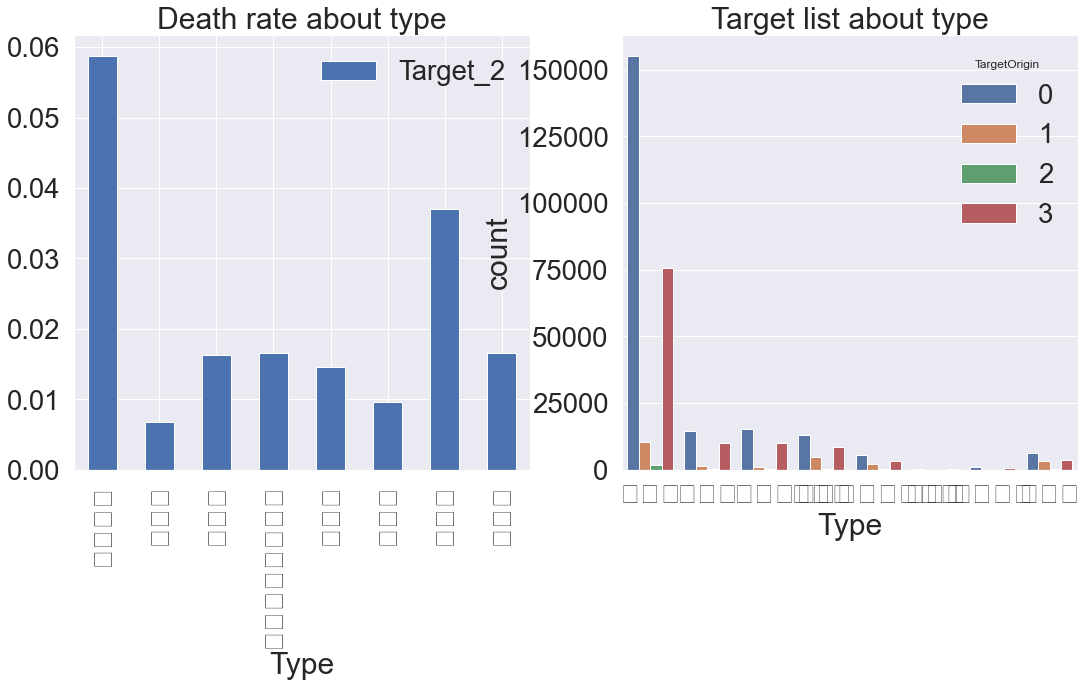

In [22]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sample[['Type', 'Target_2']].groupby(['Type'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Death rate about type')
sns.countplot('Type', hue='TargetOrigin', data=sample, ax=ax[1])
ax[1].set_title('Target list about type')
plt.show()

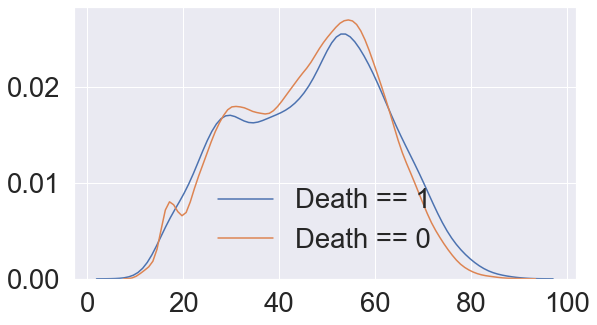

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(sample[sample['Target_2'] == 1]['Age'], ax=ax)
sns.kdeplot(sample[sample['Target_2'] == 0]['Age'], ax=ax)
plt.legend(['Death == 1', 'Death == 0'])
plt.show()

## 2. Save preprocessing data

In [24]:
# 전처리 데이터 저장(input/preprocessing.csv)
sample.to_csv('../input/preprocessing.csv', encoding='utf-8-sig',index_label=False)

In [25]:
preprocessing = pd.read_csv('../input/preprocessing.csv')

print("sample.shape:", preprocessing.shape)

# 초기 샘플 데이터
preprocessing

sample.shape: (350261, 15)


,Date,Time,Day,Location,RoadState,Weather,RoadShape,Type,Age,AgeBand,TargetOrigin,Target_0,Target_1,Target_2,Target_3
0,20100101,0,5,마포구,젖음/습기,맑음,단일로,승용차,54,50,0,1,0,0,0
1,20100101,0,5,동작구,서리/결빙,맑음,단일로,승합차,57,50,3,0,0,0,1
2,20100101,0,5,관악구,서리/결빙,흐림,단일로,승용차,51,50,0,1,0,0,0
3,20100101,0,5,강서구,건조,맑음,교차로,승용차,56,50,0,1,0,0,0
4,20100101,0,5,구로구,건조,맑음,교차로,승용차,33,30,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23,1,동작구,건조,맑음,단일로,승용차,34,30,0,1,0,0,0
362293,20181231,23,1,강서구,건조,맑음,교차로,승용차,56,50,1,0,1,0,0
362294,20181231,23,1,강동구,건조,맑음,교차로,승용차,57,50,0,1,0,0,0
362295,20181231,23,1,강동구,건조,맑음,단일로,승용차,59,50,0,1,0,0,0


## 3.EDA and Correlation Coefficient analysis

In [26]:
sample

,Date,Time,Day,Location,RoadState,Weather,RoadShape,Type,Age,AgeBand,TargetOrigin,Target_0,Target_1,Target_2,Target_3
0,20100101,0,5,마포구,젖음/습기,맑음,단일로,승용차,54,50,0,1,0,0,0
1,20100101,0,5,동작구,서리/결빙,맑음,단일로,승합차,57,50,3,0,0,0,1
2,20100101,0,5,관악구,서리/결빙,흐림,단일로,승용차,51,50,0,1,0,0,0
3,20100101,0,5,강서구,건조,맑음,교차로,승용차,56,50,0,1,0,0,0
4,20100101,0,5,구로구,건조,맑음,교차로,승용차,33,30,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23,1,동작구,건조,맑음,단일로,승용차,34,30,0,1,0,0,0
362293,20181231,23,1,강서구,건조,맑음,교차로,승용차,56,50,1,0,1,0,0
362294,20181231,23,1,강동구,건조,맑음,교차로,승용차,57,50,0,1,0,0,0
362295,20181231,23,1,강동구,건조,맑음,단일로,승용차,59,50,0,1,0,0,0


In [27]:
from sklearn.preprocessing import StandardScaler
sample2 = sample.drop(['AgeBand','Target_0','Target_1','Target_2','Target_3'],axis = "columns")

tsample = sample2[sample2['TargetOrigin']==0]
std_scaler = StandardScaler()
std_scaler.fit(tsample)
tsample = std_scaler.transform(tsample)   #normalize ,데이터 정규화 작업
tsample.shape

tsample2 = sample2[sample2['TargetOrigin']==1]
std_scaler = StandardScaler()
std_scaler.fit(tsample2)
tsample2 = std_scaler.transform(tsample2)   #normalize ,데이터 정규화 작업
tsample2.shape

tsample3 = sample2[sample2['TargetOrigin']==2]
std_scaler = StandardScaler()
std_scaler.fit(tsample3)
tsample3 = std_scaler.transform(tsample3)   #normalize ,데이터 정규화 작업
tsample3.shape

tsample4 = sample2[sample2['TargetOrigin']==3]
std_scaler = StandardScaler()
std_scaler.fit(tsample4)
tsample4 = std_scaler.transform(tsample4)   #normalize ,데이터 정규화 작업
tsample4.shape

ValueError: could not convert string to float: '마포구'

In [ ]:
corr = np.corrcoef(np.transpose(tsample))
corr2 = np.corrcoef(np.transpose(tsample2))
corr3 = np.corrcoef(np.transpose(tsample3))
corr4 = np.corrcoef(np.transpose(tsample4))


In [ ]:
corr

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
label = sample.columns[:9]
heatmap2 = sns.heatmap(corr,cbar = True,annot = True,square = True,fmt = '.2f',annot_kws = {'size':5},
                      yticklabels = label,xticklabels = label)
plt.show()

In [ ]:

heatmap2 = sns.heatmap(corr2,cbar = True,annot = True,square = True,fmt = '.2f',annot_kws = {'size':5},
                      yticklabels = label,xticklabels = label)
plt.show()

In [ ]:

heatmap2 = sns.heatmap(corr3,cbar = True,annot = True,square = True,fmt = '.2f',annot_kws = {'size':5},
                      yticklabels = label,xticklabels = label)
plt.show()

In [ ]:
heatmap2 = sns.heatmap(corr4,cbar = True,annot = True,square = True,fmt = '.2f',annot_kws = {'size':5},
                      yticklabels = label,xticklabels = label)
plt.show()

In [ ]:
def preprocessing(feature):
    temp = pd.get_dummies(feature)
    temp = temp.columns
    print(temp)
    for a in range(0,len(temp)):
        feature = np.where(feature == temp[a],a,feature)
    return feature

In [ ]:
# label 바꾸는 과정

sample.Location=preprocessing(sample.Location)
sample.Location
sample.RoadState = preprocessing(sample.RoadState)
sample.Weather = preprocessing(sample.Weather)
sample.RoadShape = preprocessing(sample.RoadShape)
sample.Type = preprocessing(sample.Type)

In [ ]:

sample['Location'] = sample['Location'].astype('int')

sample['Day'] = sample['Day'].astype('int')
sample['RoadState'] = sample['RoadState'].astype('int')
sample['Weather'] = sample['Weather'].astype('int')
sample['RoadShape'] = sample['RoadShape'].astype('int')
sample['Type'] = sample['Type'].astype('int')